## Load Libraries

In [81]:
!pip install tensorflow
!pip install keras
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install keras-utils

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
%matplotlib inline

## Load Data Set


In [83]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()



## Analyze the Data Set

Training Size: 60000
Test Size: 10000


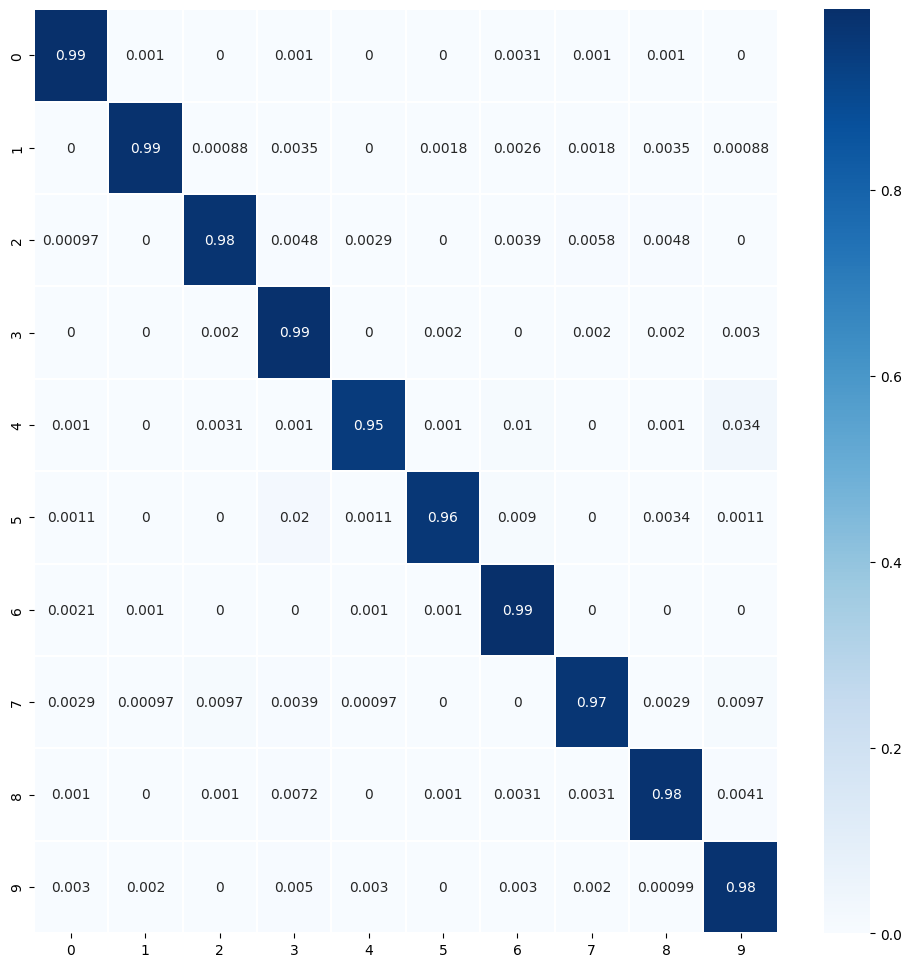

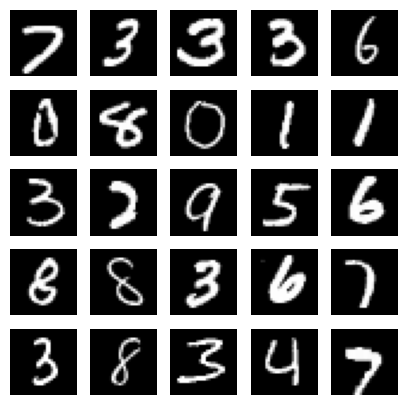

In [84]:
training_size = X_train.shape[0]
test_size = X_test.shape[0]

print('Training Size:', training_size)
print('Test Size:', test_size)

indexes = np.random.randint(0, training_size, size=25) # get 25 random ints from 0 to training size
images = X_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1) # split the display into 5x5 and plot the i + 1 entry
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [85]:
unique, counts = np.unique(y_train, return_counts=True)
print('Training Labels:', dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print('Test Labels:', dict(zip(unique, counts)))




Training Labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test Labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


## Prepare the Data

In [86]:
num_labels = len(np.unique(y_train))
print('Num labels', num_labels)

Num labels 10


In [87]:
labels = np.unique(y_train)
print(labels)

[0 1 2 3 4 5 6 7 8 9]


In [88]:
# convert to one-hot vector
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [89]:
y_train[0], y_test[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

In [90]:
# image dimensions (assumed square)
image_size = X_train.shape[1]
input_size = image_size * image_size
input_size

784

In [91]:
# resize and normalize
X_train.shape, X_train[0].shape

((60000, 28, 28), (28, 28))

In [92]:
X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype('float32') / 255
X_test = np.reshape(X_test, [-1, input_size])
X_test = X_test.astype('float32') / 255
X_train.shape, X_train[0].shape


((60000, 784), (784,))

## Build the Model

In [93]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [94]:
batch_size = 128
hidden_units = 256

model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size)) # The training shape is a vector with 784 values
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=batch_size)


Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 0.2603 - accuracy: 0.9248
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0958 - accuracy: 0.9709
Epoch 3/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0624 - accuracy: 0.9808
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0454 - accuracy: 0.9854
Epoch 5/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0354 - accuracy: 0.9889
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0254 - accuracy: 0.9917
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0218 - accuracy: 0.9930
Epoch 8/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0150 - accuracy: 0.9949
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0166 - accuracy: 0.9943
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0138 - accuracy

## Analyze the Model

In [95]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 activation_15 (Activation)  (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               65792     
                                                                 
 activation_16 (Activation)  (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 10)                2570      
                                                                 
 activation_17 (Activation)  (None, 10)                0         
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 26932

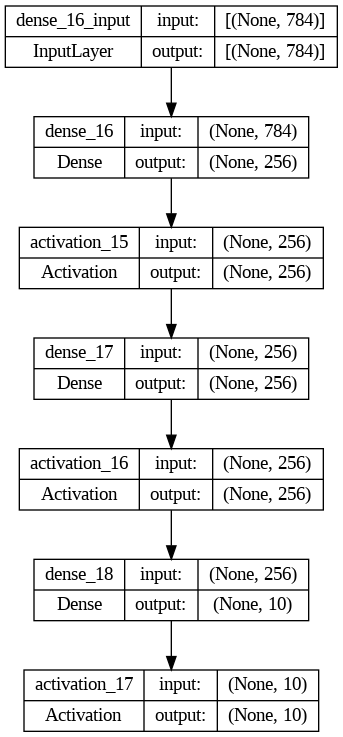

In [96]:
#from keras.utils.visualize_util import plot_model
tf.keras.utils.plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

## Analyze Model's Performance

In [97]:
loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 3ms/step - loss: 0.1077 - accuracy: 0.9803

Test accuracy: 98.0%


In [98]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# create a confusion matrix to visually represent incorrectly classified images
def plot_confusion_matrix(y_true, y_pred, classes, out_path=""):
    cm = confusion_matrix(y_true, y_pred,normalize="true")
    df_cm = pd.DataFrame(cm, index=[i for i in classes], columns=[i for i in classes])
    plt.figure(figsize=(12, 12))
    ax = sn.heatmap(df_cm, annot=True, linewidths=.125,cmap="Blues" ,cbar_kws={"shrink": 1})
    return ax

In [99]:
labels=['0',
'1',
'2',
'3',
'4',
'5',
'6',
'7',
'8',
'9',]

313/313 [==============================] - 1s 2ms/step


<Axes: >

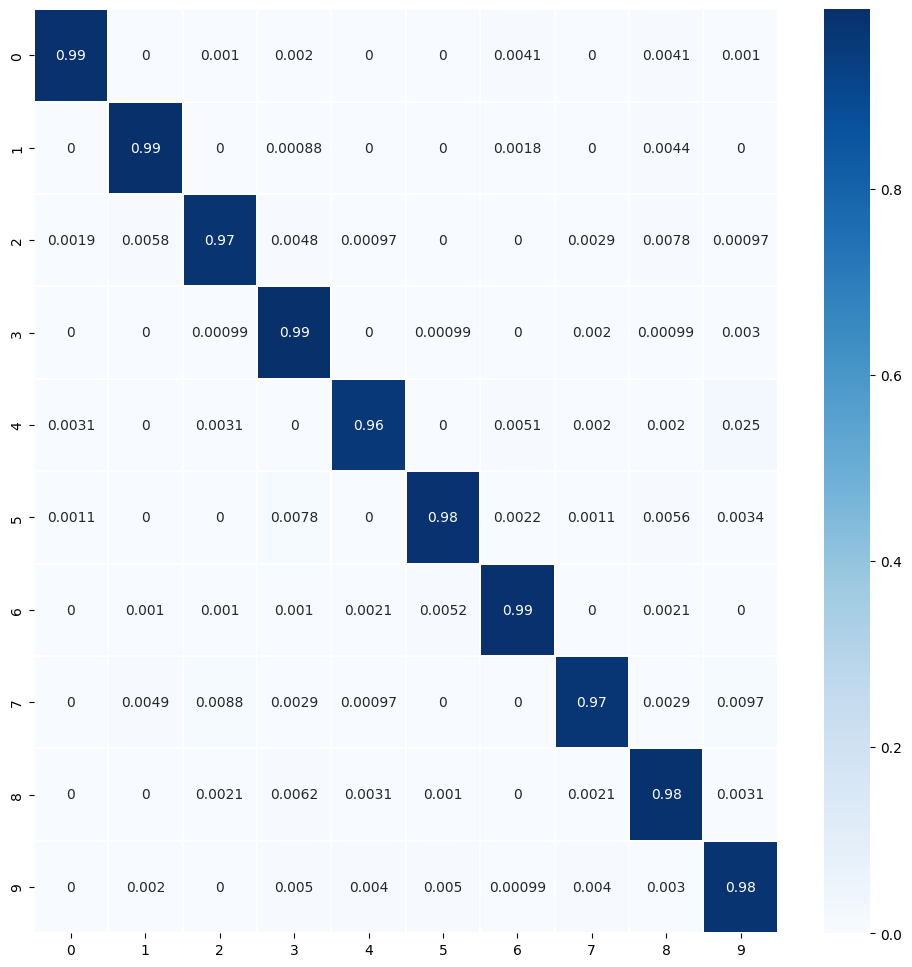

In [100]:
y_pred=model.predict(X_test)
plot_confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1),labels)

In [101]:
plt.show()